In [1]:
# IMPORTAMOS TODAS LAS LIBRERÍAS QUE NECESITAMOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from datetime import datetime

import pickle

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth',1000)

In [2]:
# VAMOS A COMENZAR CON LAS PRUEBAS DE ENTRENAMIENTO DE DISTINTOS MODELOS

df_completo = pd.read_csv('../data/df_model_completo.csv', index_col=0)
# df_max_rel = pd.read_csv('../data/df_model_max_rel.csv', index_col=0)

## VAMOS A TRANSFORMAR EN TRAIN Y TEST PARA LOS POSTERIORES ESTUDIOS DE LOS MODELOS

train = df_completo.iloc[:-500, :]
test = df_completo.drop(columns=['buy_price']).iloc[-500:, :]

train.to_csv('../data/train.csv')
test.to_csv('../data/test.csv')


In [3]:
print(train.shape)
test.shape

(18684, 36)


(500, 35)

In [4]:
df_completo.head()

,sq_mt_built,n_rooms,n_bathrooms,floor,is_floor_under,buy_price,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,has_parking,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,Pisos,Casa o chalet,Áticos,Dúplex,distrito_id_num,neighborhood_id_num,neighborhood_price_m2,estimado_metros_por_preciom2
0,64.0,2,1.0,3.0,0,85000,0,0,1960.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.0,0,1,0,0,1,0,0,0,21.0,135.0,1308.89,83768.96
1,70.0,3,1.0,4.0,0,129900,1,0,1970.0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.0,0,0,0,0,1,0,0,0,21.0,132.0,1796.68,125767.60
2,94.0,2,2.0,1.0,0,144247,0,0,1970.0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0.0,0,0,0,0,1,0,0,0,21.0,134.0,1617.18,152014.92
3,64.0,2,1.0,0.5,1,109900,0,0,1955.0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0.0,0,0,1,0,1,0,0,0,21.0,134.0,1617.18,103499.52
4,108.0,2,2.0,4.0,0,260000,0,0,2003.0,0,0,1,1,1,1,0,1,0,0,1,0,1,1,0.0,1,1,1,1,1,0,0,0,21.0,133.0,1827.79,197401.32


In [5]:
X= df_completo.drop(columns=(['buy_price']))

y= df_completo['buy_price']

features = [X.columns]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.10,
                                                    random_state=42)

In [6]:
modelo_rf = RandomForestRegressor(
            n_estimators = 1000,
            # criterion = 'squared_error',
            # max_depth=50,
            )

modelo_rf.fit(X_train, y_train)

predictions_rf = modelo_rf.predict(X_test)

In [7]:
print(modelo_rf.score(X_train, y_train))
print(modelo_rf.score(X_test, y_test))

print('MAE:', mean_absolute_error(y_test, predictions_rf))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions_rf))

0.9900372496631697
0.9235613042107623
MAE: 49948.35201273651
MAPE: 0.12769451790036015


In [8]:
predictions_rf = modelo_rf.predict(test)
# predictions_rf

In [17]:
# LO EXPORTAMOS EN PICKLE PARA LA ENTREGA

import os

filename = '../model/modelo_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '.sav'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(modelo_rf, archivo_salida)

In [14]:
path_my_model  = '../model/modelo_20220913-224431.sav'

with open(path_my_model, 'rb') as archivo_entrada:
    my_model = pickle.load(archivo_entrada)

In [15]:
test = pd.read_csv('../data/test.csv', index_col=[0])
test.shape

(500, 35)

In [16]:

predicciones = my_model.predict(test)

predicciones_test = pd.DataFrame(test.index)
predicciones_test['preds'] = predicciones

In [13]:
holi

NameError: name 'holi' is not defined

In [ ]:

# predicciones_test.to_csv('../data//predicciones_PRUEBA', index = False)

c:\Users\pieci\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  after removing the cwd from sys.path.


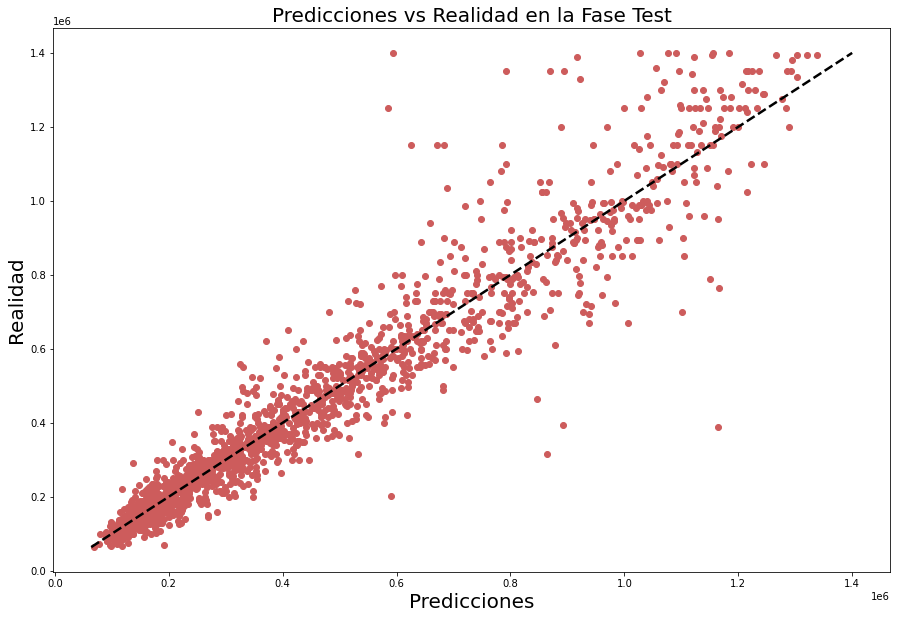

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

# sns.scatterplot(predictions_rf, y_test.values, marker='^',  color='indianred', s=75)
plt.plot(predictions_rf, y_test.values, 'ro', color='indianred')
plt.xlabel('Predicciones', fontsize = 20)
plt.ylabel('Realidad', fontsize = 20)
plt.title('Predicciones vs Realidad en la Fase Test', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2.5)
plt.show()

In [ ]:
df_completo['buy_price'].mean()

423635.766941201

In [ ]:
# comp_errores = pd.DataFrame(y_test)
# comp_errores['predictions_rf']= predictions_rf
# comp_errores['errores'] = abs(y_test-predictions_rf)

# comp_errores.sort_values(by='errores', ascending=False).head(50)

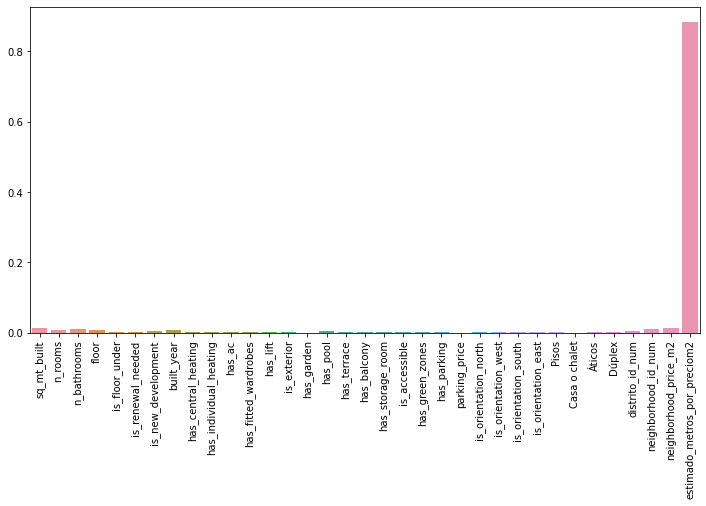

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=features[0], y=modelo_rf.feature_importances_)
plt.xticks(rotation=90);

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()

# Data scaled
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Modelo 1 - XGBRegressor
modelo = XGBRegressor(
    # max_depth=6, 
    # learning_rate=0.08
    )

modelo.fit(X_train, y_train)

preds = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print(modelo.score(X_train, y_train))
print(modelo.score(X_test, y_test))

print('MAE:', mean_absolute_error(y_test, preds))
print('MAPE:', mean_absolute_percentage_error(y_test, preds))

0.97256020837281
0.923704828616937
r2score 0.923704828616937
MAE: 51810.348299488665
MAPE: 0.13023816803888683


In [ ]:
## VAMOS A PROBAR CON REDES NEURONALES PARA VER QUE RESULTADOS NOS DA
from tensorflow import keras

X= df_completo.drop(columns=(['buy_price']))

y= df_completo['buy_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(64, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(64, activation = 'relu',
                      ),
    keras.layers.Dense(1, activation= 'relu')
])

model.compile(loss = 'mse',
             optimizer = tf.keras.optimizers.RMSprop(0.001),
             metrics = ['mae', 'mse'])

history = model.fit(X_train,
                y_train,
                epochs = 100,
                validation_split=0.20,
                callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
                )

In [ ]:
pd.DataFrame(history.history).sort_values(by='val_mean_absolute_error', ascending=True)